**Image Classification using Deep AutoViML** <br/>

Dataset: Fruit dataset from Kaggle: contains 240 and 60 images of apples, banana, oranges and mixed fruit in train and validation respectively.

https://www.kaggle.com/mbkinaci/fruit-images-for-object-detection <br/>

Reference - https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_Image_Classification_Demo.ipynb

In [1]:
!pip install deep_autoviml --upgrade

In [2]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


Imported deep_auto_viml. version=0.0.69
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [3]:
# Download a file based on its file ID.
file_id = '18DbC6Xj4NP-hLzI14WuMaAEyq482vNfn'

# Download dataset
!gdown https://drive.google.com/uc?id={file_id}

# Unzip the downloaded file
!unzip -q PlantVillage.zip

!mv ./PlantVillage/val ./PlantVillage/test

Downloading...
From: https://drive.google.com/uc?id=18DbC6Xj4NP-hLzI14WuMaAEyq482vNfn
To: /content/PlantVillage.zip
100% 866M/866M [00:06<00:00, 141MB/s]


In [4]:
!mkdir -p ./PlantVillageFiltered/train
!cp -r ./PlantVillage/train/Apple___Apple_scab/ ./PlantVillageFiltered/train
!cp -r ./PlantVillage/train/Apple___Black_rot ./PlantVillageFiltered/train
!cp -r ./PlantVillage/train/Apple___Cedar_apple_rust ./PlantVillageFiltered/train
!cp -r ./PlantVillage/train/Apple___healthy ./PlantVillageFiltered/train

!mkdir -p ./PlantVillageFiltered/test
!cp -r ./PlantVillage/test/Apple___Apple_scab ./PlantVillageFiltered/test
!cp -r ./PlantVillage/test/Apple___Black_rot ./PlantVillageFiltered/test
!cp -r ./PlantVillage/test/Apple___Cedar_apple_rust ./PlantVillageFiltered/test
!cp -r ./PlantVillage/test/Apple___healthy ./PlantVillageFiltered/test

In [5]:
image_dir = './PlantVillageFiltered'
target = 'image'
img_height = 224
img_width = 224
img_channels = 3

project_name = "plants"
keras_model_type = "image"
keras_options = {"early_stopping": True, 'lr_scheduler': 'rlr', "epochs": 3}
model_options = {'tuner':"storm", "max_trials":1, 'cat_feat_cross_flag':True, 
                 'image_directory': image_dir, 'image_height': img_height, 
                 'image_width':img_width, 'image_channels':img_channels }

    Only CPU found on this device
Setting CPU strategy using 1 devices
    Image directory given as ./PlantVillageFiltered
For image use case:
    Image height given as 224
    Image width given as 224
    Image channels given as 3
No validation folder found under given image directory ./PlantVillageFiltered. Returning...
Found 2536 files belonging to 4 classes.

Splitting train into two: train and validation data
Number of image classes = 4 and they are: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']
Training image model. This will take time...
Epoch 1/3
20/20 [==============================] - 66s 3s/step - loss: 1.1906 - accuracy: 0.5358 - val_loss: 0.6603 - val_accuracy: 0.7617
Epoch 2/3
20/20 [==============================] - 52s 3s/step - loss: 0.5233 - accuracy: 0.8232 - val_loss: 0.3611 - val_accuracy: 0.8984
Epoch 3/3
8/8 [==============================] - 15s 2s/step - loss: 0.2413 - accuracy: 0.9473
    Model accuracy in Image val

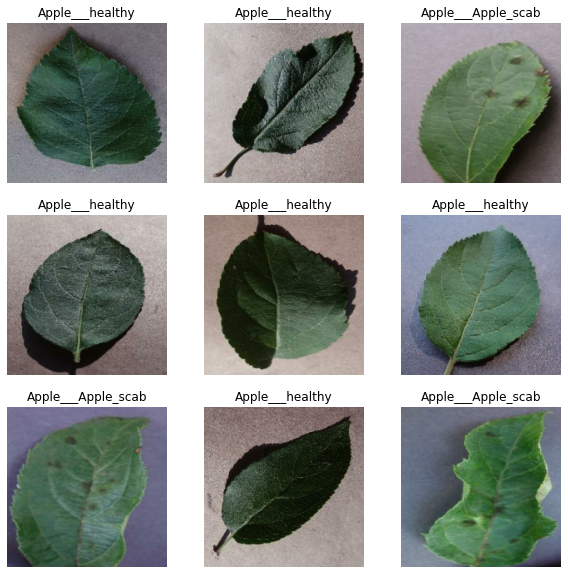

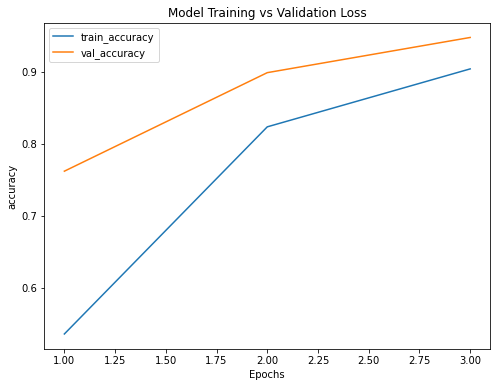

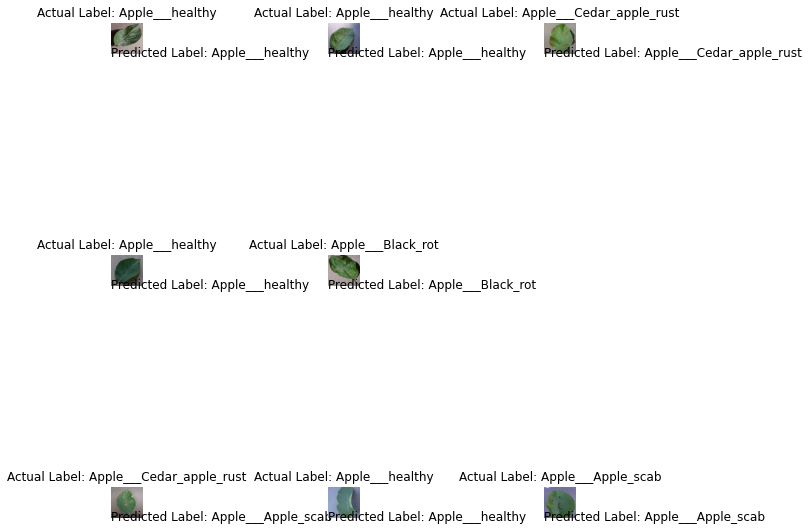

In [6]:
model, dicti = deepauto.fit("", target, keras_model_type=keras_model_type, 
                            project_name=project_name, save_model_flag=True, 
                            model_options=model_options, keras_options=keras_options, 
                            use_my_model="", verbose=1)

In [7]:

test_image_dir = './PlantVillageFiltered/test' 
predictions = deepauto.predict_images(test_image_dir, model, dicti, keras_model_type="image")
print(predictions)


Loading deep_autoviml model from <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f76dbd565d0> folder. This will take time...

Using <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f76dbd565d0> model provided as input...
Time taken to load saved model = 0 seconds
    loading and predicting on folder: ./PlantVillageFiltered/test
Found 635 files belonging to 4 classes.
    Sample predictions before inverse_transform: [3 3 0 0 3]
    Sample predictions after inverse_transform: ['Apple___healthy' 'Apple___healthy' 'Apple___Apple_scab'
 'Apple___Apple_scab' 'Apple___healthy']
[array([[0.01 , 0.002, 0.001, 0.987],
       [0.013, 0.006, 0.011, 0.97 ],
       [0.829, 0.036, 0.011, 0.123],
       ...,
       [0.161, 0.041, 0.117, 0.681],
       [0.029, 0.887, 0.045, 0.039],
       [0.008, 0.005, 0.025, 0.961]], dtype=float32), array(['Apple___healthy', 'Apple___healthy', 'Apple___Apple_scab',
       'Apple___Apple_scab', 'Apple___healthy', 'Apple___Apple_sc